Here we have the data of employee in a Company.Based on the data we will try to predict who will leave or stay with the company.This information would be useful for the HR to make an informed decision on talent retention.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-data/HR_comma_sep.csv


### Importing the data

In [2]:
df = pd.read_csv('../input/hr-data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


From the above data it seems we may have to scale the average monthly hours.

### Establishing accuracy needed by model

In [5]:
df.left.value_counts()/len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

So we can see that 76.19 % of the employee stay with the company.So if we built a machine learning model it should have an accuracy more than 76.19 % to be of any use to us.

### Rescaling

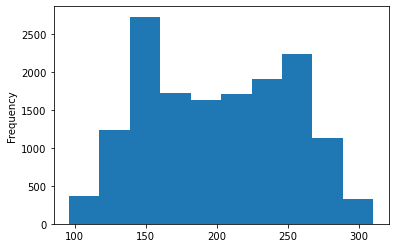

In [6]:
df['average_montly_hours'].plot(kind = 'hist');

The value of monthly hours worked ranges from 100 to 300 hours.So We can rescale this parameter.

In [7]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

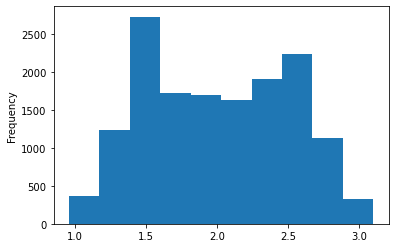

In [8]:
df['average_montly_hours_100'].plot(kind = 'hist');

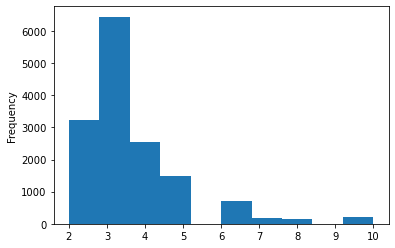

In [9]:
df['time_spend_company'].plot(kind = 'hist');

This range is between 2 to 10 years.So we will not be rescaling this feature in our dataset.

### Converting categorical feature to binary dummy values

In [10]:
df_dummies = pd.get_dummies(df[['sales','salary']])

In [11]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

### Creating Matric of Features

In [13]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years','average_montly_hours_100']],df_dummies],axis=1).values
y = df['left'].values

In [14]:
X.shape

(14999, 22)

### Train test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

### Building the Model

In [16]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [17]:
model = Sequential()
model.add(Dense(1,input_dim=22,activation='sigmoid'))
model.compile(Adam(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 23        
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,epochs =10)

Epoch 1/10
11999/11999 [==============================] - 1s 61us/step - loss: 0.3066 - accuracy: 0.9738
Epoch 2/10
11999/11999 [==============================] - 0s 39us/step - loss: 4.1333e-04 - accuracy: 1.0000
Epoch 3/10
11999/11999 [==============================] - 0s 40us/step - loss: 2.4336e-04 - accuracy: 1.0000
Epoch 4/10
11999/11999 [==============================] - 0s 41us/step - loss: 1.6666e-04 - accuracy: 1.0000
Epoch 5/10
11999/11999 [==============================] - 1s 42us/step - loss: 1.2076e-04 - accuracy: 1.0000
Epoch 6/10
11999/11999 [==============================] - 0s 41us/step - loss: 9.0529e-05 - accuracy: 1.0000
Epoch 7/10
11999/11999 [==============================] - 0s 41us/step - loss: 6.9370e-05 - accuracy: 1.0000
Epoch 8/10
11999/11999 [==============================] - 1s 43us/step - loss: 5.3752e-05 - accuracy: 1.0000
Epoch 9/10
11999/11999 [==============================] - 1s 43us/step - loss: 4.2427e-05 - accuracy: 1.0000
Epoch 10/10
11999/11999

In [20]:
y_test_pred = model.predict_classes(X_test)

### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,y_test_pred)

array([[2265,    0],
       [   0,  735]])

In [23]:
def pretty_confusion_matrix(y_true,y_pred,labels =["False","True"]):
    cm = confusion_matrix(y_true,y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm,index = labels,columns = pred_labels)
    return df

In [24]:
pretty_confusion_matrix(y_test,y_test_pred,['Stay','Leave'])

,Predicted Stay,Predicted Leave
Stay,2265,0
Leave,0,735


In [25]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [26]:
print('Precision:\t{:0.3f}'.format(precision_score(y_test,y_test_pred)))
print('Recall:   \t{:0.3f}'.format(recall_score(y_test,y_test_pred)))
print('F1 score: \t{:0.3f}'.format(f1_score(y_test,y_test_pred)))

Precision:	1.000
Recall:   	1.000
F1 score: 	1.000


In [27]:
from sklearn.metrics import classification_report 

In [28]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2265
           1       1.00      1.00      1.00       735

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### Cross Validation

In [29]:
from keras.wrappers.scikit_learn import KerasClassifier


In [30]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1,input_dim=22,activation ='sigmoid'))
    model.compile(Adam(lr=0.5),'binary_crossentropy',metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs = 10,verbose = 0)

In [31]:
from sklearn.model_selection import KFold,cross_val_score

In [32]:
cv = KFold(5,shuffle=True)
scores = cross_val_score(model,X,y,cv=cv)
scores

array([1., 1., 1., 1., 1.])

In [33]:
print('The cross validation accuracy is {:0.4f} ± {:0.4f}'.format(scores.mean(),scores.std()))

The cross validation accuracy is 1.0000 ± 0.0000


In this model we are getting the accuracy score value to be more than 76% so our model is performing better than the benchmark value.